<a href="https://colab.research.google.com/github/sameh999/Machine-learning/blob/main/ML_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sklearn_som
!pip install scikit-learn==1.0
!pip install minisom
!pip install yellowbrick --upgrade
!pip install JasonUtils --upgrade

##import all library needed 

In [ ]:
from sklearn import datasets
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans,DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn_som.som import SOM
from pylab import plot, axis, show, pcolor, colorbar, bone
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score ,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import mutual_info_classif, chi2, f_classif
from sklearn.feature_selection import SequentialFeatureSelector

from collections import defaultdict
from JasonUtils.TicToc import timing
from sklearn.utils.multiclass import unique_labels
from tqdm import tqdm
from yellowbrick.cluster import KElbowVisualizer


## load data from csv file 

In [ ]:
def loadDataset():
  #reed data set from files uploaded in my google dive 
  training_data =pd.read_csv('https://raw.githubusercontent.com/sameh999/assign-3-machine-/main/Pokemon_train.csv') # Pokemon_train.csv
  testing_data =pd.read_csv('https://raw.githubusercontent.com/sameh999/assign-3-machine-/main/Pokemon_test.csv') 
  # reed the future training data set and store it in variable
  train_feature =training_data.iloc[:,:-1]
  #reed the future testing data set and store it in variable
  test_feature = testing_data.iloc [:,7] 
  # reed the label training data set and store it in variable
  train_label = training_data.iloc[ :,8]
  #reed the label testing data set and store it in variable
  test_label = testing_data.iloc[:,32]
  return train_feature ,test_feature ,train_label, test_label


In [ ]:
#reed the data 
train_feature ,test_feature ,train_label, test_label =loadDataset()
print ("the taining feature shape is " ,train_feature.shape )
train_feature

the taining feature shape is  (1251, 32)


,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed
0,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,0.500000,0.500000,1.000000,2.000000,2.000000,2.000000,95.000000,7680.000000,70.000000,355.000000,45.000000,50.000000,6.000000e+05,0.700000,45.000000,88.100000,347.000000,40.000000,50.000000,75.000000
1,0.990403,1.0,0.990403,1.000000,0.990403,2.038386,0.509597,0.495202,1.0,1.980807,2.038386,0.990403,0.495202,0.490403,0.990403,0.990403,1.980807,2.000000,133.464544,3864.567294,70.000000,515.191932,45.287898,130.287898,1.058711e+06,1.694242,84.520170,50.000000,525.040340,60.287898,81.343524,25.287898
2,1.000000,1.0,1.000000,2.000000,1.000000,1.000000,0.500000,1.000000,1.0,2.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,0.500000,0.500000,70.000000,5120.000000,70.000000,310.000000,45.000000,50.000000,1.059860e+06,0.400000,50.000000,88.100000,258.000000,50.000000,50.000000,40.000000
3,0.500000,1.0,1.000000,1.000000,0.500000,1.000000,0.500000,1.000000,1.0,0.500000,2.000000,0.500000,1.000000,1.000000,1.000000,2.000000,0.500000,2.000000,123.588302,8491.030113,70.000000,527.747870,42.252130,61.282340,1.000000e+06,1.028234,66.831914,85.773470,196.636341,100.495741,107.252130,68.297445
4,0.334368,0.5,0.000000,1.662527,1.000000,0.334368,1.000000,1.000000,1.0,0.668737,0.337473,1.662527,1.000000,2.000000,1.000000,1.662527,2.000000,1.000000,56.749463,2560.000000,93.623119,524.076666,28.312634,87.575591,8.000000e+05,1.432505,88.374731,66.670456,322.211607,111.563172,106.563172,73.250537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,1.000000,1.0,1.000000,0.500000,1.000000,1.000000,1.000000,0.500000,1.0,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,59.114137,5120.000000,70.000000,434.308344,160.178881,54.141396,1.000000e+06,0.782283,64.778534,50.000000,379.218049,76.592845,77.991483,101.689948
1247,0.250000,0.5,0.000000,2.000000,1.000000,0.250000,1.000000,1.000000,1.0,0.500000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,46.039017,2560.000000,70.000000,489.546241,47.824422,91.039017,8.000000e+05,1.143512,73.117052,88.100000,352.339304,104.156069,111.039017,64.156069
1248,1.000000,1.0,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.0,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,56.924721,7779.092938,45.763476,455.806227,89.591543,91.548327,1.000000e+06,0.769247,60.387082,76.383188,437.171933,105.397770,81.161245,60.387082
1249,0.918972,1.0,1.000000,0.324110,1.000000,0.459486,2.000000,2.000000,1.0,0.878459,0.418972,2.000000,1.000000,0.581028,1.000000,1.486165,1.000000,1.837945,52.292479,3840.000000,70.000000,296.790468,233.122563,82.707521,6.000000e+05,0.548617,35.861653,50.000000,290.162055,33.241102,33.241102,59.446611


## apply Gaussian naive bayes 


In [ ]:
# apply Gaussian naive bayes 
nb = GaussianNB() 
#print(train_feature)
# make fit the model on training feature and label
nb.fit(train_feature, train_label)
# make a predection bt test feature 
Pred_label = nb.predict(test_feature)
# get the accuracy of the model  
acc = accuracy_score(test_label, Pred_label) * 100
print("Accuracy of GNB ", acc)
matrix =classification_report(test_label, Pred_label)
print(matrix)

Accuracy of GNB  51.43769968051119
              precision    recall  f1-score   support

         bug       0.18      0.44      0.26        16
        dark       1.00      0.60      0.75        20
      dragon       0.56      0.94      0.70        16
    electric       0.23      0.44      0.30        16
       fairy       0.56      1.00      0.72         9
    fighting       0.83      0.86      0.84        22
        fire       0.35      0.67      0.46        18
       ghost       0.57      0.47      0.52        17
       grass       0.00      0.00      0.00        18
      ground       0.50      0.86      0.63        21
         ice       0.50      0.43      0.46        21
      normal       0.00      0.00      0.00        24
      poison       0.50      0.50      0.50        20
     psychic       0.71      0.22      0.33        23
        rock       0.83      0.67      0.74        15
       steel       1.00      1.00      1.00        19
       water       0.50      0.06      0.10   

## apply SVM model on the data 

In [ ]:
#convert training and test data and label to array to list to can model work on it 
train = np.array(train_feature)
train_l =  np.array(train_label)
test = np.array(test_feature)
test_l =  np.array(test_label)
# call the model SVM 
model = svm.SVC(kernel='rbf')
# make fit the model on training feature 
model.fit(train, train_l)
train_accuracy =model.score( train, train_l)*100
print('Accuracy of model: {:.2f}%'.format(train_accuracy))

pred_svm= model.predict(test)
acc =accuracy_score( pred_svm, test_l)*100
print('Accuracy of model after test: {:.2f}%'.format(acc))

print('\nClassification Report:\n')
print(classification_report(test_l, pred_svm))

print('\nConfusion Matrix:\n')
print(confusion_matrix(test_l, pred_svm))

Accuracy of model: 17.99%
Accuracy of model after test: 12.14%

Classification Report:

              precision    recall  f1-score   support

         bug       0.00      0.00      0.00        16
        dark       0.00      0.00      0.00        20
      dragon       0.29      0.94      0.44        16
    electric       0.06      0.88      0.12        16
       fairy       0.22      1.00      0.36         9
    fighting       0.00      0.00      0.00        22
        fire       0.00      0.00      0.00        18
       ghost       0.00      0.00      0.00        17
       grass       0.00      0.00      0.00        18
      ground       0.00      0.00      0.00        21
         ice       0.00      0.00      0.00        21
      normal       0.00      0.00      0.00        24
      poison       0.00      0.00      0.00        20
     psychic       0.00      0.00      0.00        23
        rock       0.00      0.00      0.00        15
       steel       0.00      0.00      0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
def plotData(features, labels, cls, class_names):
  colors = ['b', 'r', 'g']
  markers = ['o', 'X', '^']
  for class_index in range(len(cls)):
    plt.scatter(features[labels == cls[class_index],0], features[labels == cls[class_index],1], c=colors[class_index], marker=markers[class_index], label=class_names[cls[class_index]])
  Title = "Tsne Dataset with {n} classes".format(n=int(len(cls)))
  plt.title(Title)
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.legend()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



Shape of X: (1251, 32)
Shape of X after PCA: (1251, 2)
Accuracy of GNB after t-SNE (%): 23.58113509192646


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:442: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names



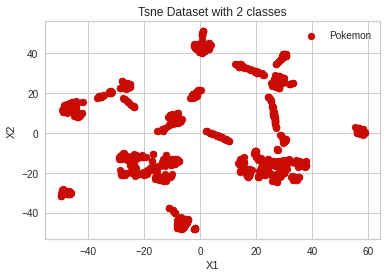

In [ ]:
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(train)
nb.fit(X_tsne, train_l)
Pred_np = nb.predict(X_tsne)
acc_tsne = accuracy_score(train_l, Pred_np) * 100

print('Shape of X:', train_feature.shape)
print('Shape of X after PCA:', X_tsne.shape)
print("Accuracy of GNB after t-SNE (%):", acc_tsne)

plt.scatter(X_tsne[:,0], X_tsne[:,1], c = 'r', marker='o', label='Pokemon')
Title = ("Tsne Dataset with 2 classes")
plt.title(Title)
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()


In [ ]:
X_tsne

array([[-47.492424 , -30.697973 ],
       [ 55.538513 ,   2.867001 ],
       [ 23.987427 , -17.802649 ],
       ...,
       [ -1.5734683,  19.29776  ],
       [-49.17785  , -28.389772 ],
       [ 25.881712 ,  12.999123 ]], dtype=float32)

In [ ]:
#apply TSNE with training data and plot reselt 
tsne = TSNE(n_components=2, random_state=0)
#make fit to apply the the TSNE model on test data 
com_tsne_train = tsne.fit_transform(train_feature)
#use express lybrary to pott tsne acording to test label in color 
fig = px.scatter(
    com_tsne_train, x=0, y=1,
    color=train_label, labels={'color': 'lapel'}
)
fig.show()  # show the figer 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [ ]:
#apply TSNE with test data and plot reselt 
tsne = TSNE(n_components=2, random_state=0)
#make fit to apply the the TSNE model on test data 
com_tsne_test = tsne.fit_transform(test_feature)
#use express lybrary to pott tsne acording to test label in color 
fig = px.scatter(
    com_tsne_test, x=0, y=1,
    color=test_label, labels={'color': 'lapel'}
)
fig.show()  # show the figger 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



###apply k-kmeans

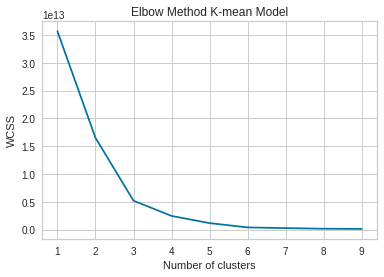

In [ ]:
# apply K-mean
wcss = []
for i in range(1, 10):
  #APPLY THE K-MEAN on the on diffrent number of cluster no 
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=40, random_state=0)
  # make fit to the model on train data 
  kmeans.fit(train_feature)
  #distances of samples to their cluster center is inertia_
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method K-mean Model')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# apply the k-mean with the best number of cluster and plot the cluster 
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=150, random_state=0)
pred_y= kmeans.fit_predict(train_feature)  
#use express library to polt tsne acording to test label in color 
fig = px.scatter(
    com_tsne_train, x=0, y=1,
    color=pred_y, labels={'color': 'pred_y'}
)
fig.show()  # show the figger 

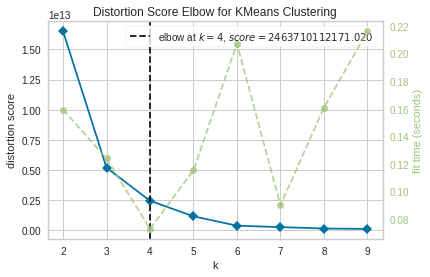

In [ ]:

# Instantiate the clustering model and visualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))
visualizer.fit(train_feature)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

### apply the LDA to reduce dimentionalty of feature 

In [ ]:

#apply the new n-componant on the LDA 
LDA = LinearDiscriminantAnalysis(n_components=10)
#make fit to lda on the 
X_lda_tr = LDA.fit( train_feature, train_label).transform(train_feature)
# apply the lda on test data 
X_lda_test = LDA.transform( test_feature)

fig = px.scatter_matrix(
  X_lda_tr, 
  dimensions = range(2),
  color=train_label, labels={'color': 'Pred_label'}
)
fig.show()  # show the figger 

In [ ]:
pca = PCA()
components = pca.fit_transform(train_feature,train_label)
lab = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
fig = px.scatter_matrix(
    components,
    #labels=lab,
    dimensions=range(2),
    color=train_label
)
#fig.update_traces(diagonal_visible=False)
fig.show()

#Dimensionality Reduction (DR) methods

##GNB with LDA  

Accuracy of GNB 0.51%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:442: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:442: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:442: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:442: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:442: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:442: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:442

Maximum accuracy:0.97%
Best number of features: 10


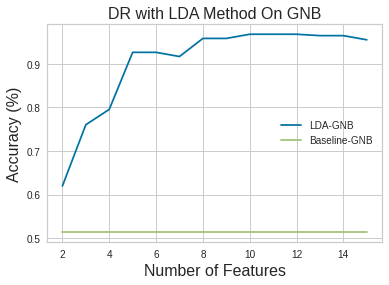

In [ ]:
nb = GaussianNB() 
# make fit the model on training feature and label
nb.fit(train_feature, train_label)
# make a predection bt test feature 
Pred_label = nb.predict(test_feature)
# get the accuracy of the model  
acc = accuracy_score(test_label, Pred_label)
print("Accuracy of GNB {:.2f}%".format(acc))
#make dictionary to store the accuracy of model after change n-component 
acc_dict_beforeDR = {}
acc_dict_afterDR = {}
for nf in range(2,16):
  #apply the new n-componant on the LDA 
  LDA = LinearDiscriminantAnalysis(n_components=nf)
  #make fit to lda on the 
  X_lda_tr = LDA.fit( train_feature, train_label).transform(train_feature)
  # apply the lda on test data 
  X_lda_test = LDA.transform( test_feature)
  # fit the model nb with the new data come from LDA 
  nb.fit(X_lda_tr, train_label)
  #predect with test data to get accuracy of model 
  Pred_lda = nb.predict(X_lda_test) 
  #get accuracy of the model  
  acc_lda = accuracy_score(test_label, Pred_lda)
  #add the accuracy of the model to dictionary with ncomponant  
  acc_dict_afterDR[nf] = acc_lda
  acc_dict_beforeDR[nf]= acc
  
# plot the accuracy of model after lda with vs ncomponant 
plt.plot(*zip(*sorted(acc_dict_afterDR.items())),label='LDA-GNB')
# plot the accuracy of model without lda vs ncomponant 
plt.plot(*zip(*sorted(acc_dict_beforeDR.items())),label='Baseline-GNB')
Title = "DR with LDA Method On GNB"
plt.title(Title, fontsize=16)
plt.xlabel("Number of Features", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=16)
plt.legend()
improved_acc_GNB = max(acc_dict_afterDR.values())
print("Maximum accuracy:{:.2f}%".format(improved_acc_GNB))
print("Best number of features:", max(acc_dict_afterDR, key=acc_dict_afterDR.get))

# LDA features improved 
LDA = LinearDiscriminantAnalysis(n_components=10)
X_lda_tr_improved= LDA.fit( train_feature, train_label).transform(train_feature)
X_lda_test_improved = LDA.transform( test_feature)

## GNB with PCA


Accuracy of GNB 0.51%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:442: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:442: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:442: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:442: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:442: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:442: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:442

Maximum accuracy:0.52%
Best number of features: 18


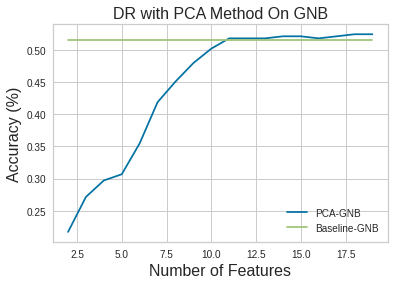

In [ ]:
nb = GaussianNB() 
#print(train_feature)
# make fit the model on training feature and label
nb.fit(train_feature, train_label)
# make a predection bt test feature 
Pred_label = nb.predict(test_feature)
# get the accuracy of the model  
acc = accuracy_score(test_label, Pred_label)
print("Accuracy of GNB {:.2f}%".format( acc))
#make dictionary to store the accuracy of model after change n-component 
acc_dict_beforeDR = {}
acc_dict_afterDR = {}
for nf in range(2,20):
  #apply the new n-componant on the LDA 
  pca = PCA(n_components=nf)
  #make fit to lda on the 
  X_pca_tr = pca.fit(train_feature).transform(train_feature)
  X_pca_test = pca.transform(test_feature)
  nb.fit(X_pca_tr,train_label)
  yPred_pca = nb.predict(X_pca_test)
  acc_pca = accuracy_score(test_label, yPred_pca)
  acc_dict_afterDR[nf] = acc_pca
  acc_dict_beforeDR[nf]= acc

plt.plot(*zip(*sorted(acc_dict_afterDR.items())),label='PCA-GNB')
plt.plot(*zip(*sorted(acc_dict_beforeDR.items())),label='Baseline-GNB')

Title = "DR with PCA Method On GNB"
plt.title(Title, fontsize=16)
plt.xlabel("Number of Features", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=16)
plt.legend()
print("Maximum accuracy:{:.2f}%".format( max(acc_dict_afterDR.values())))
print("Best number of features:", max(acc_dict_afterDR, key=acc_dict_afterDR.get))

##SVM with LDA  

Accuracy of model : 0.12%
Maximum accuracy:0.98%
Best number of features: 10


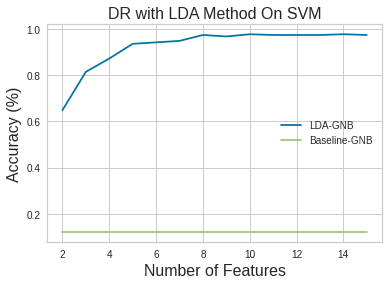

In [ ]:
# call the model SVM 
svm = svm.SVC(kernel='rbf')
# make fit the model on training feature 
svm.fit(train, train_l)
pred_svm= svm.predict(test)
acc =accuracy_score( pred_svm, test_l)
print('Accuracy of model : {:.2f}%'.format(acc))
#make dictionary to store the accuracy of model after change n-component 
acc_dict_beforeDR = {}
acc_dict_afterDR = {}
for nf in range(2,16):
  #apply the new n-componant on the LDA 
  LDA = LinearDiscriminantAnalysis(n_components=nf)
  X_lda_tr = LDA.fit( train_feature, train_label).transform(train_feature)
  X_lda_test = LDA.transform(test_feature)
  # make fit to lda on the lda train data
  svm.fit(X_lda_tr, train_label)
  Pred_lda = svm.predict(X_lda_test)
  # get accuracy of the model with lad 
  acc_lda = accuracy_score(test_label, Pred_lda)
  #add the accuracy of the model to dictionary with ncomponant  
  acc_dict_afterDR[nf] = acc_lda
  acc_dict_beforeDR[nf]= acc
# plot the accuracy of model after lda with vs ncomponant 
plt.plot(*zip(*sorted(acc_dict_afterDR.items())),label='LDA-GNB')
# plot the accuracy of model without lda vs ncomponant 
plt.plot(*zip(*sorted(acc_dict_beforeDR.items())),label='Baseline-GNB')

Title = "DR with LDA Method On SVM"
plt.title(Title, fontsize=16)
plt.xlabel("Number of Features", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=16)
plt.legend()
improved_acc_svm = max(acc_dict_afterDR.values())
# prent the best accuracy of the svm model 
print("Maximum accuracy:{:.2f}%".format(improved_acc_svm))
# prent the best n component  of the svm model 
print("Best number of features:", max(acc_dict_afterDR, key=acc_dict_afterDR.get))

## SVM with PCA


Accuracy of model : 0.12%
Maximum accuracy:0.17%
Best number of features: 2


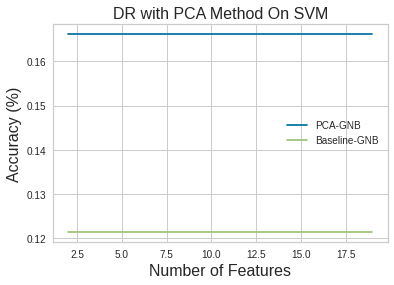

In [ ]:
from sklearn import svm
# call the model SVM 
svm = svm.SVC(kernel='rbf')
# make fit the model on training feature 
svm.fit(train, train_l)
pred_svm= svm.predict(test)
acc =accuracy_score( pred_svm, test_l)
print('Accuracy of model : {:.2f}%'.format(acc))

acc_dict_beforeDR = {}
acc_dict_afterDR = {}
for nf in range(2,20):
  pca = PCA(n_components=nf)
  X_pca_tr = pca.fit(train_feature).transform(train_feature)
  X_pca_test = pca.transform(test_feature)
  svm.fit(X_pca_tr,train_label)
  yPred_pca = svm.predict(X_pca_test)
  acc_pca = accuracy_score(test_label, yPred_pca)
  acc_dict_afterDR[nf] = acc_pca

  acc_dict_beforeDR[nf]= acc

plt.plot(*zip(*sorted(acc_dict_afterDR.items())),label='PCA-GNB')
plt.plot(*zip(*sorted(acc_dict_beforeDR.items())),label='Baseline-GNB')

Title = "DR with PCA Method On SVM"
plt.title(Title, fontsize=16)
plt.xlabel("Number of Features", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=16)
plt.legend()
print("Maximum accuracy:{:.2f}%".format(max(acc_dict_afterDR.values())))
print("Best number of features:", max(acc_dict_afterDR, key=acc_dict_afterDR.get))

# Feature Selection Methods


In [ ]:
# use this function to make feature selection 
def select_feature(X_TR, y_TR, X_TS, y_TS, FSM, MODEL):
 #define the feature selection method 
  fs = FSM
  # make fit to model to apply to train data 
  fs.fit(X_TR, y_TR)
  X_TR_new = fs.transform(X_TR)
  # transform to test data 
  X_TS_new = fs.transform(X_TS) 
  # apply model on the new data after make feature selection 
  MODEL.fit(X_TR_new, y_TR)
  yPred = model.predict(X_TS_new)
  # get accuracy 
  acc = accuracy_score(y_TS, yPred)
  return acc

## GNB with Filter Method

Accuracy of GNB before FS (%): 0.97%
Maximum accuracy: 0.96%
Best number of features: 9


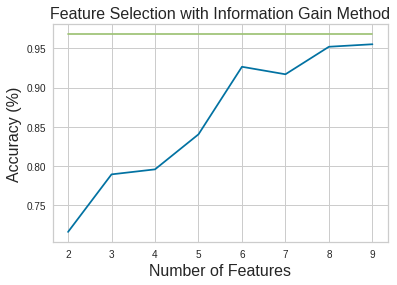

In [ ]:
nb = GaussianNB() 
# make fit the model on training feature and label
nb.fit(X_lda_tr_improved, train_label)
# make a predection bt test feature 
Pred_label =  nb.predict(X_lda_test_improved)
# get the accuracy of the model  
acc = accuracy_score(test_label, Pred_label)
print("Accuracy of GNB before FS (%): {:.2f}%".format( acc))
#make dictionary to store the accuracy of model after change n-component 
acc_dict_afterDR = {}
acc_dict_beforeDR = {}
model = GaussianNB() 

for nf in range(2,10):
  #build feature selection model with n feature 
  fsm =  SelectKBest(mutual_info_classif, k=nf)
  # call the function that we build before to apply the feature selection on data and add value to dic 
  acc_dict_afterDR[nf] = select_feature(X_lda_tr_improved, train_label, X_lda_test_improved, test_label, fsm, model)
  acc_dict_beforeDR[nf] = acc

# plot the accuracy of model after apply feature selection 
plt.plot(*zip(*sorted(acc_dict_afterDR.items())),label = "GBN with Filter Method")
# plot the accuracy of model without feature selection 
plt.plot(*zip(*sorted(acc_dict_beforeDR.items())),label = "Baseline-improved")

Title = "Feature Selection with Information Gain Method"
plt.title(Title, fontsize=16)
plt.xlabel("Number of Features", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=16)
# print the best accuracy from 2 to 10 time to model 
print("Maximum accuracy: {:.2f}%".format( max(acc_dict_afterDR.values())))
# print the best number of feature that give best accuracy 
print("Best number of features:", max(acc_dict_afterDR, key=acc_dict_afterDR.get))

## GNB Wrapper

Accuracy of GNB before FS (%): 0.97%
Maximum accuracy:0.96%
Best number of features: 9


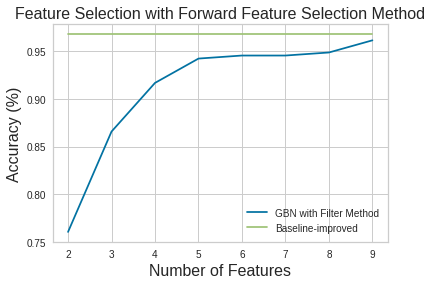

In [ ]:
nb = GaussianNB() 
# make fit the model on training feature and label
nb.fit(X_lda_tr_improved, train_label)
# make a predection bt test feature 
yPred = nb.predict(X_lda_test_improved)
acc = accuracy_score(test_label, yPred)
print("Accuracy of GNB before FS (%): {:.2f}%".format(acc))

model = GaussianNB() 
acc_dict_afterDR = {}
acc_dict_beforeDR = {}
for nf in range(2,10):
  #build feature selection of sequential feature  with n feature 
  sfs =SequentialFeatureSelector(model, n_features_to_select=nf)
  # call the function that we build before to apply the feature selection on data and add value to dic 
  acc_dict_afterDR [nf] = select_feature(X_lda_tr_improved, train_label, X_lda_test_improved, test_label, sfs, model)
  acc_dict_beforeDR[nf] = acc

# plot the accuracy of model after apply feature selection 
plt.plot(*zip(*sorted(acc_dict_afterDR.items())),label = "GBN with Filter Method")
# plot the accuracy of model without feature selection 
plt.plot(*zip(*sorted(acc_dict_beforeDR.items())),label = "Baseline-improved")
Title = "Feature Selection with Forward Feature Selection Method"
plt.title(Title, fontsize=16)
plt.xlabel("Number of Features", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=16)
plt.legend()
# print the best accuracy from 2 to 10 time to model 
print("Maximum accuracy:{:.2f}%".format( max(acc_dict_afterDR.values())))
# print the best number of feature that give best accuracy 
print("Best number of features:", max(acc_dict_afterDR, key=acc_dict_afterDR.get))

## SVM with Filter Method

Accuracy of GNB before FS (%):0.98%
Maximum accuracy:0.98%
Best number of features: 10


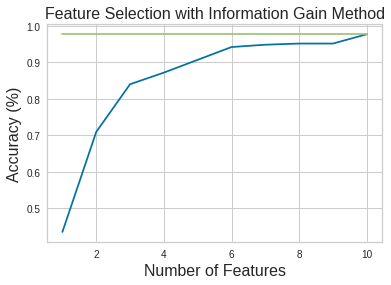

In [ ]:
from sklearn import svm
# call the model SVM 
svm = svm.SVC(kernel='rbf')
# make fit the model on training feature 
svm.fit(X_lda_tr_improved, train_label)
# predict the label of the test data 
pred_svm= svm.predict(X_lda_test_improved)
# calculate the accuracy of the model by compare
# the predicted label with the oreginal label
acc =accuracy_score( pred_svm, test_label)
print("Accuracy of GNB before FS (%):{:.2f}%".format(acc))

#build feature selection of sequential feature  with n feature 
acc_dict_afterDR = {}
acc_dict_beforeDR = {}
from sklearn import svm
model = svm.SVC(kernel='rbf')
for nf in range(1,11):
  #build feature selection of Select K Best with n feature 
  fsm =  SelectKBest(mutual_info_classif, k=nf)
  # call the function that we build before to apply the feature selection on data and add value to dic 
  acc_dict_afterDR[nf] = select_feature(X_lda_tr_improved, train_label, X_lda_test_improved, test_label, fsm, model)
  acc_dict_beforeDR[nf] = acc

# plot the accuracy of model after apply feature selection 
plt.plot(*zip(*sorted(acc_dict_afterDR.items())),label = "SVM with Filter Method")
# plot the accuracy of model without feature selection 
plt.plot(*zip(*sorted(acc_dict_beforeDR.items())),label = "Baseline-improved")
Title = "Feature Selection with Information Gain Method"
plt.title(Title, fontsize=16)
plt.xlabel("Number of Features", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=16)

# print the best accuracy from 2 to 10 time to model 
print("Maximum accuracy:{:.2f}%".format( max(acc_dict_afterDR.values())))
# print the best number of feature that give best accuracy 
print("Best number of features:", max(acc_dict_afterDR, key=acc_dict_afterDR.get))

## SVM Wrapper Method

Accuracy of GNB before FS (%):0.98%
Maximum accuracy:0.98%
Best number of features: 8


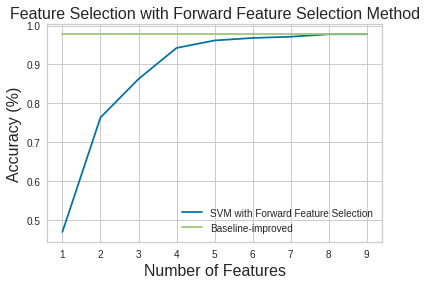

In [ ]:
from sklearn import svm
# call the model SVM 
svm = svm.SVC(kernel='rbf')
# make fit the model on training feature 
svm.fit(X_lda_tr_improved, train_label)
pred_svm= svm.predict(X_lda_test_improved)
acc =accuracy_score( test_label,pred_svm)
# print accuracy 
print("Accuracy of GNB before FS (%):{:.2f}%".format( acc))

acc_dict_afterDR = {}
acc_dict_beforeDR = {}
from sklearn import svm
model = svm.SVC(kernel='rbf')
for nf in range(1,10):
  #build feature selection of sequential feature  with n feature 
  sfs = SequentialFeatureSelector(model, n_features_to_select=nf)
  acc_dict_afterDR [nf] = select_feature(X_lda_tr_improved, train_label, X_lda_test_improved, test_label, sfs, model)
  acc_dict_beforeDR[nf] = acc

# plot the accuracy of model after apply feature selection 
plt.plot(*zip(*sorted(acc_dict_afterDR.items())),label = "SVM with Forward Feature Selection")
# plot the accuracy of model without feature selection 
plt.plot(*zip(*sorted(acc_dict_beforeDR.items())),label = "Baseline-improved")
Title = "Feature Selection with Forward Feature Selection Method"
plt.title(Title, fontsize=16)
plt.xlabel("Number of Features", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=16)
plt.legend()

# print the best accuracy from 2 to 10 time to model 
print("Maximum accuracy:{:.2f}%".format(max(acc_dict_afterDR.values())))
# print the best number of feature that give best accuracy 
print("Best number of features:", max(acc_dict_afterDR, key=acc_dict_afterDR.get))




# Q6 elbow K-means


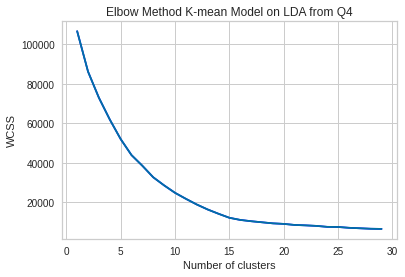

In [ ]:
# applay K-mean elbow for improved in q4
wcss = []
# the list to put in it the silhouette of evry ncluster 
sil =[]
for i in range(1, 30):
   # apply the k-mean on the new n cluster
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=50, random_state=0)
    #fit the prediction 
    pred_y =kmeans.fit_predict(X_lda_tr_improved)
    #add values to wcss to plot it leater 
    wcss.append(kmeans.inertia_)
    #add values to sil to plot it leater 
    sil.append(pred_y)

plt.plot(range(1, 30), wcss ,color='blue')
plt.plot(range(1, len(wcss)+1), wcss)

plt.title('Elbow Method K-mean Model on LDA from Q4')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

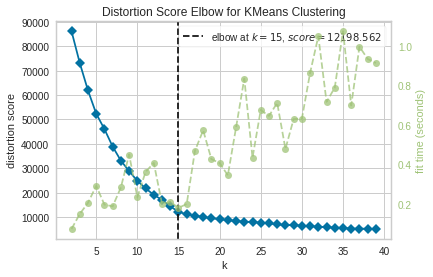

In [ ]:
# Instantiate the clustering model and visualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,40))
visualizer.fit(X_lda_tr_improved)    # Fit the data to the visualizer
visualizer.show()   

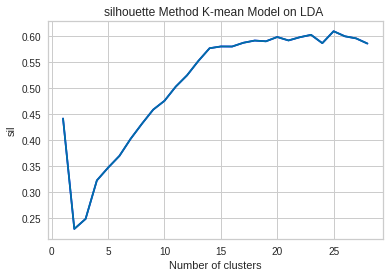

In [ ]:
ss=[]
for i in range(1,29):
  s = silhouette_score(X_lda_tr_improved, sil[i], metric='euclidean')
  ss.append(s)
  #print("silhwiet score : ",i ,"equal = {:.2f}%".format( s))
x=range(0, len(sil))
plt.plot(range(1,len(ss)+1), ss,color='blue')
plt.plot(range(1, len(ss)+1), ss)
plt.title('silhouette Method K-mean Model on LDA ')
plt.xlabel('Number of clusters')
plt.ylabel('sil')
plt.show()

##Q7 best number of neurons for SOM algorithm

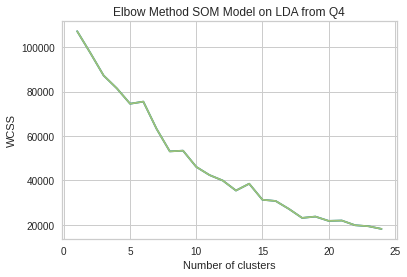

In [ ]:
wcss =[]
sil =[]
_,dim =X_lda_tr_improved.shape
for nClusters in range(1,25):
  # apply the k-mean on the new n cluster
  train_som = SOM(nClusters, n=1, dim=dim)
  #fit the prediction 
  train_som.fit(X_lda_tr_improved)
  predictions =train_som.fit_predict(X_lda_tr_improved)
  #add values to wcss to plot it leater 
  wcss.append(train_som.inertia_)
  #add values to sil to plot it leater 
  sil.append(predictions)   
    
plt.plot(range(1,len(wcss)+1), wcss)
plt.plot(range(1, len(wcss)+1), wcss)

plt.title('Elbow Method SOM Model on LDA from Q4')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
# the optemum number is 18

###plot the enitial nerouns 

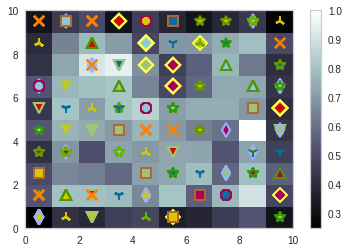

In [ ]:
# Defining X variables for the input of SOM
X = X_lda_tr_improved
classes = np.array(train_label)
classnames, indices = np.unique(classes, return_inverse=True)
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
pd.DataFrame(X)
# Set the hyper parameters
som_grid_rows = 10
som_grid_columns = 10
iterations = 2000
sigma = 1
learning_rate = 0.5

# define SOM:
som = MiniSom(x = som_grid_rows, y = som_grid_columns, input_len=10, sigma=sigma, learning_rate=learning_rate)

# Initializing the weights
som.random_weights_init(X)

# Returns the distance map from the weights:
som.distance_map()
bone()
pcolor(som.distance_map().T)       # Distance map as background

markers = ['c', 'v', '1', '2', '8', 's', 'w', 'x', 'D', '*','2','^','m','*','*','c','d','y','3','v']
colors = ["r", "g", "b", "y", "m",
          (0.7,0.4,0.2), (0.9,0.1,0.5), (1,0.5,0), (1,1,0.3),
          (0.4,0.6,0), (0.4,0.7,0), (0.3,0.6,0), (0.4,0.5,0),
          (0.2,0.6,0), (0.4,0.7,0),(1,0.3,.2) , (0.6,0.7,1),
          (0.13,0.45,0) ,(0.34,0.25,0)]

for i, x in enumerate(X):
  w = som.winner(x)
  plot(w[0]+0.5 ,w[1] +0.5, markers[indices[i]],markeredgecolor = colors[indices[i]],
       markersize = 10, markeredgewidth = 2)

colorbar()
show()

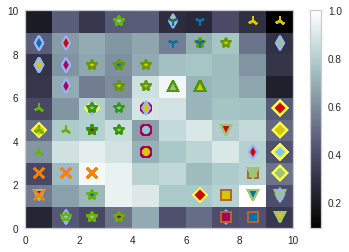

In [ ]:
#plot the final nerouns 
X = X_lda_tr_improved
classes = np.array(train_label)

classnames, indices = np.unique(classes, return_inverse=True)

sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
pd.DataFrame(X)
# Set the hyper parameters
som_grid_rows = 10
som_grid_columns = 10
iterations = 2000
sigma = 1
learning_rate = 0.5

# define SOM:
som = MiniSom(x = som_grid_rows, y = som_grid_columns, input_len=10, sigma=sigma, learning_rate=learning_rate)

# Initializing the weights
som.random_weights_init(X)

# Training
som.train_random(X, iterations)

# Returns the distance map from the weights:
som.distance_map()
bone()
pcolor(som.distance_map().T)       # Distance map as background
colorbar()
markers = ['c', 'v', '1', '2', '8', 's', 'w', 'x', 'D', '*','2','^','m','*','*','c','d','y','3','v']
colors = ["r", "g", "b", "y", "m",
          (0.7,0.4,0.2), (0.9,0.1,0.5), (1,0.5,0), (1,1,0.3),
          (0.4,0.6,0), (0.4,0.7,0), (0.3,0.6,0), (0.4,0.5,0),
          (0.2,0.6,0), (0.4,0.7,0),(1,0.3,.2) , (0.6,0.7,1),
          (0.13,0.45,0) ,(0.34,0.25,0)]

for i, x in enumerate(X):
  w = som.winner(x)
  plot(w[0]+0.5 ,w[1] +0.5, markers[indices[i]],markeredgecolor = colors[indices[i]],
       markersize = 10, markeredgewidth = 2)
show()



##Using DBSCAN and Plot the epsilon and minpoints 

100%|██████████| 28/28 [00:14<00:00,  1.96it/s]


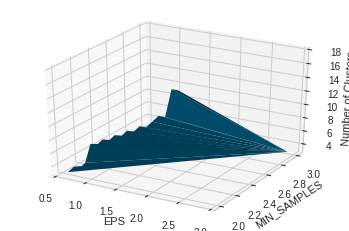

EPS: 1.40---MIN_SAMPLES: 2.00--- Number of Clusters:10.00
EPS: 1.50---MIN_SAMPLES: 2.00--- Number of Clusters:10.00
EPS: 1.60---MIN_SAMPLES: 2.00--- Number of Clusters:11.00
EPS: 1.70---MIN_SAMPLES: 2.00--- Number of Clusters:11.00
EPS: 1.80---MIN_SAMPLES: 2.00--- Number of Clusters:12.00
EPS: 1.90---MIN_SAMPLES: 2.00--- Number of Clusters:12.00
EPS: 2.00---MIN_SAMPLES: 2.00--- Number of Clusters:13.00
EPS: 2.10---MIN_SAMPLES: 2.00--- Number of Clusters:14.00
EPS: 2.20---MIN_SAMPLES: 2.00--- Number of Clusters:14.00
EPS: 2.30---MIN_SAMPLES: 2.00--- Number of Clusters:18.00


In [ ]:
epsList, msList, nClusterList = list(), list(), list()
for eps in tqdm(np.arange(0.2, 3, 0.1)):
    for ms in range(2, 15):
        model = DBSCAN(eps=eps, min_samples=ms)
        predClusters = model.fit_predict(train_feature)
        
        labels =model.labels_
        # Number of clusters in labels, ignoring noise if present.
        
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        # range number of cluster that closest to the optimal number of clusters
        if n_clusters_ >= 3 and n_clusters_ <= 18 :
          epsList.append(eps)
          msList.append(ms)
          nClusterList.append(n_clusters_)
          
  
epsList, msList, nClusterList = np.array(epsList), np.array(msList), np.array(nClusterList)
ax = plt.axes(projection='3d')
ax.plot_trisurf(epsList, msList, nClusterList)
ax.set_xlabel('EPS')
ax.set_ylabel('MIN_SAMPLES')
ax.set_zlabel('Number of Clusters')
plt.show()
# best 10 combination 
epsList = epsList[8:18]
msList = msList[8:18]
nClusterList = nClusterList[8:18]

for i in range(len(msList)):
  print('EPS: {:.2f}---MIN_SAMPLES: {:.2f}--- Number of Clusters:{:.2f}'.format(epsList[i],msList[i],nClusterList[i]))
